      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

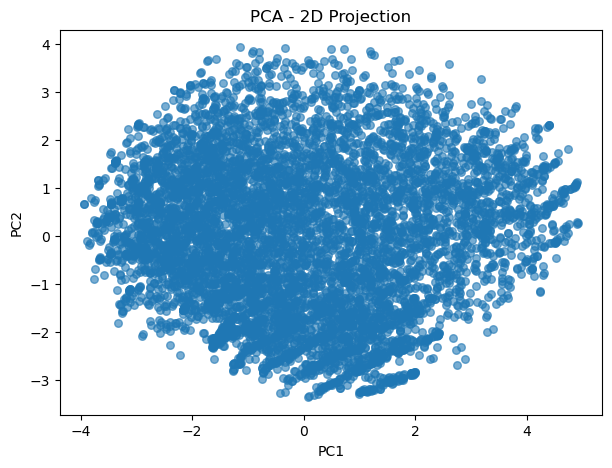

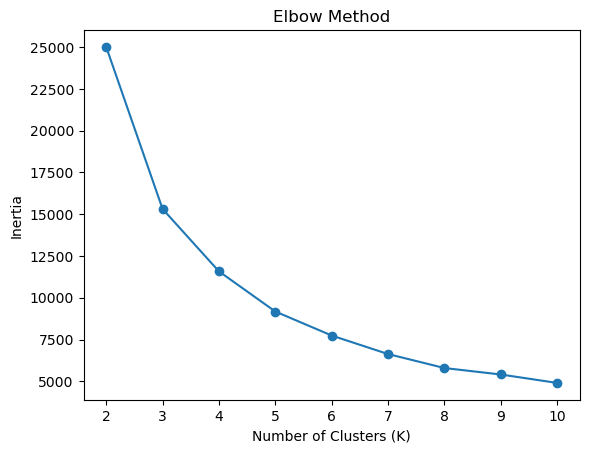

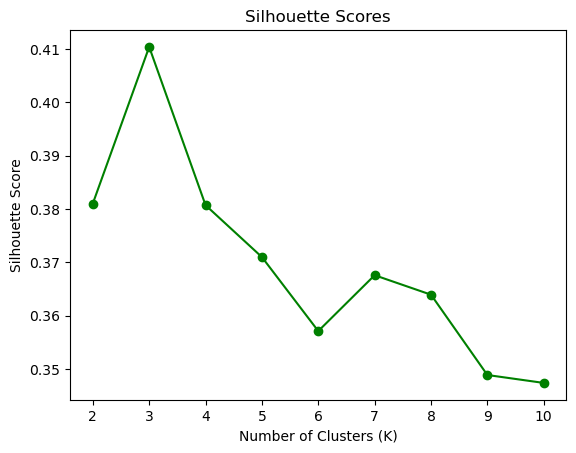

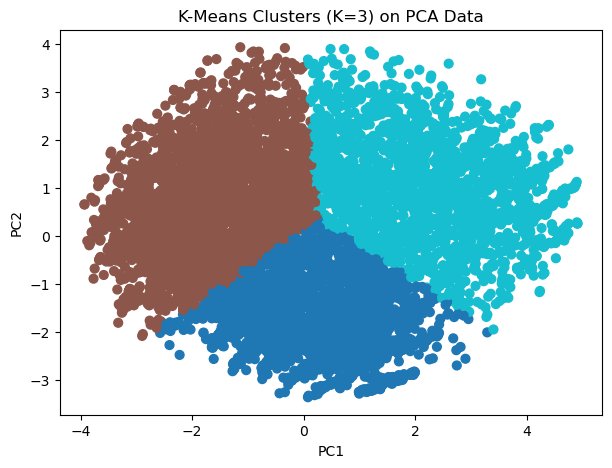

           gender  SeniorCitizen   Partner  Dependents     tenure  \
Cluster                                                             
0        0.509987       0.023799  0.536337    0.467488  32.617510   
1        0.506399       0.247166  0.268373    0.117367  14.744059   
2        0.496164       0.209719  0.719182    0.352430  56.734527   

         PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Cluster                                                                 
0            0.887803       0.499788         1.288993        1.130897   
1            0.892870       0.875686         0.675686        0.290311   
2            0.936061       1.561637         0.648082        1.078772   

         OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Cluster                                                             
0            0.988100          0.933702     1.063748     0.783255   
1            0.479707          0.444607     0.282267     0.705667   
2           

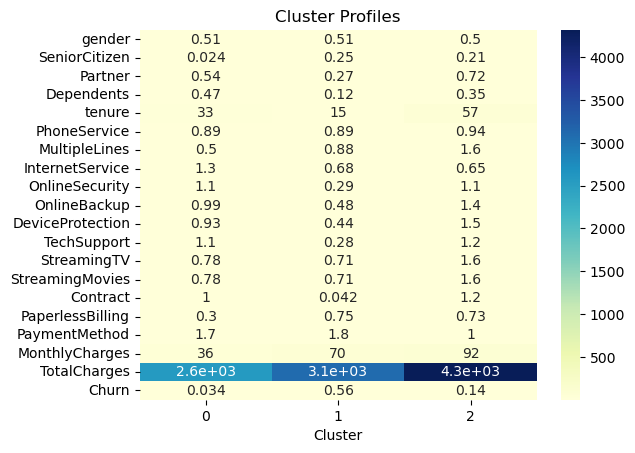

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df=pd.read_csv('/Users/nagnishal/Desktop/home work/k-mean(dataset).csv')

print(df)
print(df.shape)
df.head()

#PART A

# Drop ID-like columns if present
id_cols = [col for col in df.columns if 'id' in col.lower()]
df = df.drop(columns=id_cols, errors='ignore')

# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Fill missing values
df = df.fillna(df.median(numeric_only=True))

# Standardize numeric values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#PART B 

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

# Plot PCA scatter
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=30, alpha=0.6)
plt.title("PCA - 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#PART C 

inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Elbow Method
plt.plot(K_range, inertia, 'o-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Silhouette Scores
plt.plot(K_range, sil_scores, 'o-', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Choose K (based on plots, suppose K=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='tab10', s=40)
plt.title(f"K-Means Clusters (K={k}) on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#PART D

cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Example: compare churn %
if 'Churn' in df.columns:
    churn_rate = df.groupby('Cluster')['Churn'].mean()
    print("\nChurn rate per cluster:")
    print(churn_rate)

# Visualize cluster differences
sns.heatmap(cluster_summary.T, cmap="YlGnBu", annot=True)
plt.title("Cluster Profiles")
plt.show()